In [4]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import random

#import importlib
#import dicom_utils
#importlib.reload(dicom_utils)
from dicom_utils import DicomUtils

DATA_PATH='/home/sravya/data/DicomSegmentation/final_data/'
CONTOUR_PATH=DATA_PATH+ 'contourfiles/'

# Preprocess and Visualize

In [5]:
#Create DicomUtils object
du = DicomUtils(DATA_PATH)

In [6]:
#Generate random set of contour files
random_cfiles = []
for orig_id, patient_id in du.linkdict.items():
    #print(orig_id)
    cregex = CONTOUR_PATH + orig_id + '/i-*/*'
    cfiles = glob.glob(cregex)
    random.shuffle(cfiles)
    random_cfiles.extend(cfiles[:2])
random_cfiles

['/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0128-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0219-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-2/i-contours/IM-0001-0087-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-2/i-contours/IM-0001-0140-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-4/i-contours/IM-0001-0040-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-4/i-contours/IM-0001-0047-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-5/i-contours/IM-0001-0147-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-5/i-contours/IM-0001-0040-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contour

In [7]:
dicom_arr, mask, polygon = du.get_dicom_and_mask(random_cfiles[0])

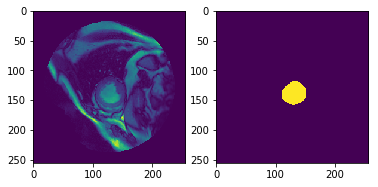

In [8]:
du.visualize_sidebyside(dicom_arr, mask)

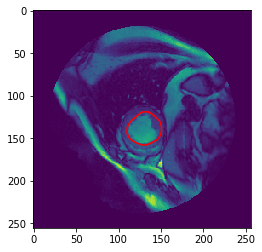

In [9]:
du.visualize_overlay(dicom_arr, polygon)

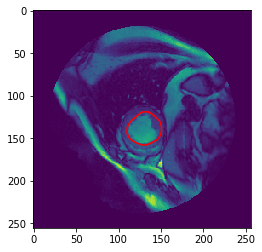

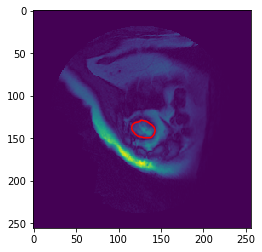

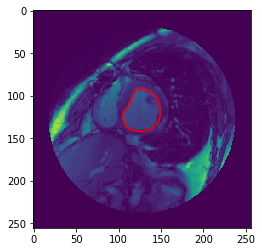

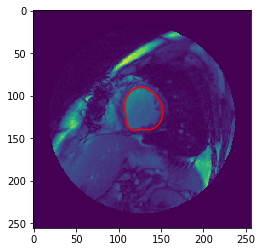

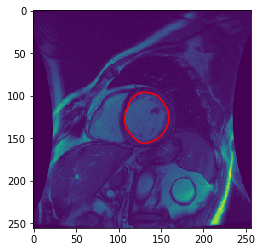

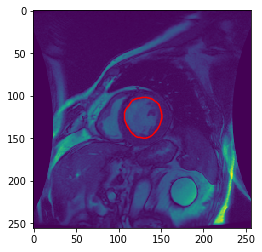

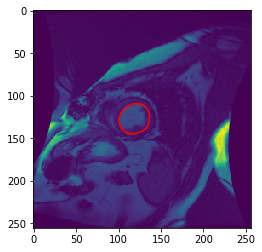

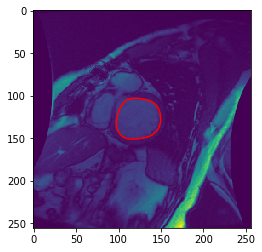

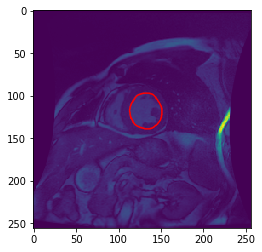

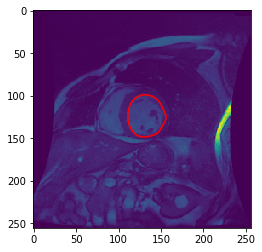

In [10]:
#Visualize overlayes for a few random contour files for a visual sanity check
for file in random_cfiles:
    dicom_arr, mask, polygon = du.get_dicom_and_mask(file)
    du.visualize_overlay(dicom_arr, polygon)

# Explore sizes of the data

In [11]:
cregex = CONTOUR_PATH + '*/i-*/*'
cfiles = glob.glob(cregex)
dicom_sizes = []
mask_sizes = []
for file in cfiles:
    dicom_arr, mask, _ = du.get_dicom_and_mask(file)
    dicom_sizes.append(dicom_arr.shape)
    mask_sizes.append(mask.shape)

(array([  0.,   0.,   0.,   0.,   0.,  96.,   0.,   0.,   0.,   0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,
         256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

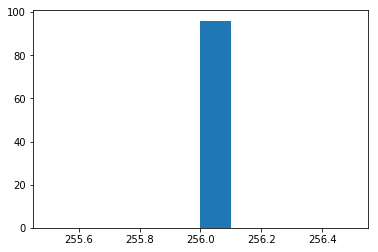

In [12]:
x = [size[0] for size in mask_sizes]
y = [size[1] for size in mask_sizes]
plt.hist(x)   

(array([  0.,   0.,   0.,   0.,   0.,  96.,   0.,   0.,   0.,   0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,
         256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

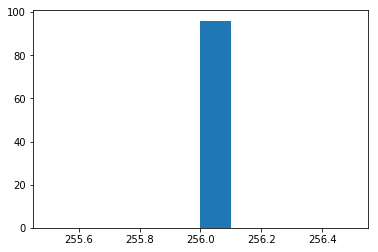

In [13]:
plt.hist(y)   

In [14]:
x_tmp = [size[0] for size in mask_sizes if size[0]!=256]
y_tmp = [size[1] for size in mask_sizes if size[0]!=256]

In [15]:
x_tmp, y_tmp

([], [])

(array([  0.,   0.,   0.,   0.,   0.,  96.,   0.,   0.,   0.,   0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,
         256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

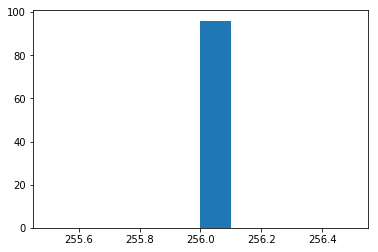

In [16]:
x = [size[0] for size in dicom_sizes]
y = [size[1] for size in dicom_sizes]
plt.hist(x)   

(array([  0.,   0.,   0.,   0.,   0.,  96.,   0.,   0.,   0.,   0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,
         256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

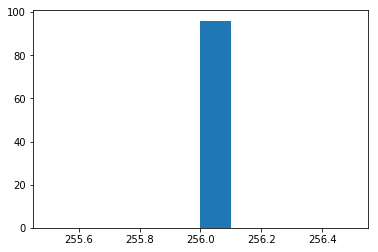

In [17]:
plt.hist(y)  

In [18]:
x_tmp = [size[0] for size in dicom_sizes if size[0]!=256]
y_tmp = [size[1] for size in dicom_sizes if size[0]!=256]

In [19]:
x_tmp, y_tmp

([], [])

In [20]:
#So all the dicoms are of shape (256,256)

# Use Data Generator

In [21]:
gen = du.data_generator(8)
try:
    while(1):
        dicoms,masks = next(gen)
        print(dicoms.shape, masks.shape)
except StopIteration:
    pass
gen.close()

Starting data generator
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)
(2048, 256) (2048, 256)


# Todo:
1. Store preprocessed data on disk for fast access - Use pickle?
2. Add test cases for error conditions